## 多项式特征解决非线性问题

In [3]:
import numpy as np
import matplotlib.pyplot as plt

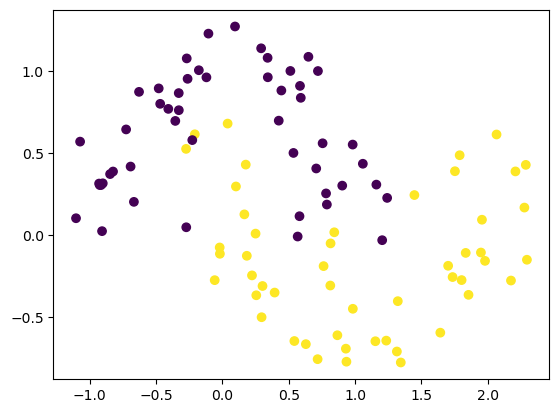

In [9]:
from sklearn.datasets import make_moons
# make_moons:生成月牙形数据
x, y = make_moons(n_samples = 100,
                  noise = 0.2,
                  # 给数据添加标准差为0.2的噪声，使得数据更贴近真实情况
                  random_state = 86)
# 默认生成的样本包含2个特征，类别个数是2，且不能更改

plt.scatter(x[:,0],x[:,1],c = y)
plt.show()

In [11]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(x,y)

LinearSVC()

In [13]:
def decision_boundary_plot(X,y,clf):
    axis_x1_min,axis_x1_max = X[:,0].min()-1,X[:,0].max()+1
    # 计算特征X第一列的最小值和最大值，分别减1和加1，确定绘图时x轴(第一特征)的范围
    axis_x2_min,axis_x2_max = X[:,1].min()-1,X[:,1].max()+1

    x1,x2 = np.meshgrid(np.arange(axis_x1_min,axis_x1_max,0.01),np.arange(axis_x2_min,axis_x2_max,0.01))
    # 使用meshgrid生成网络点，x1和x2是二维数组，形成密集的网络，步长为0.01，用于覆盖整个特征空间
    z = clf.predict(np.c_[x1.ravel(),x2.ravel()])
    # np.ravel():将多维数组展平成一维数组
    # 将x1和x2展平后按列拼接成特征矩阵使用模型clf预测这些网格点的类别，结果存储在z中
    z = z.reshape(x1.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#F5B9EF","#BBFFBB","#F9F9CB"])

    plt.contourf(x1,x2,z,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c = y)
    plt.show()

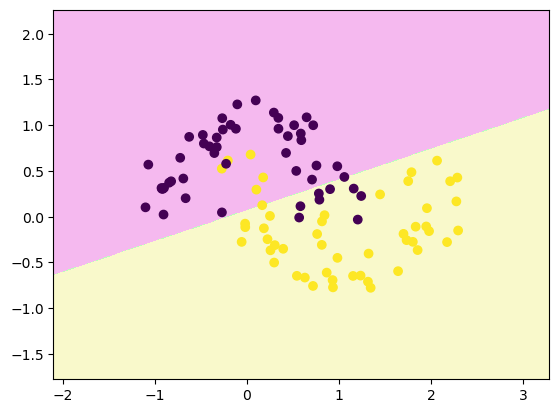

In [17]:
decision_boundary_plot(x,y,lsvc)

In [27]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

In [31]:
poly_svc = Pipeline([
    ("poly",PolynomialFeatures(degree = 3)),
    ("std_scaler",StandardScaler()),
    # 对数据进行标准化处理，使得特征均值为0，方差为1，提升模型训练效果
    # SVM算法同KNN算法一样，对归一化有很高的要求
    ("linearSVC",LinearSVC())
    # 使用线性支持向量分类器进行分类
])

In [33]:
poly_svc.fit(x,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('std_scaler', StandardScaler()), ('linearSVC', LinearSVC())])

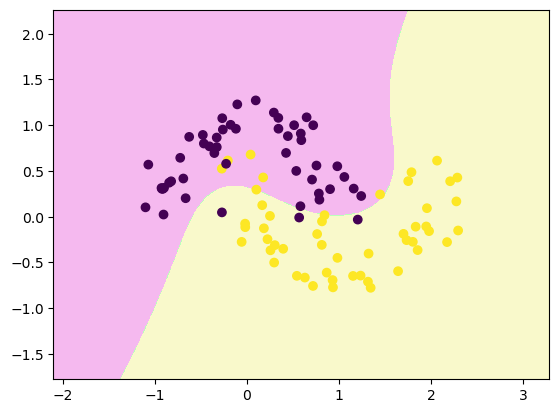

In [35]:
decision_boundary_plot(x,y,poly_svc)

### 核函数解决非线性问题

In [38]:
from sklearn.svm import SVC

In [44]:
poly_svc = Pipeline([
    ("std_scaler",StandardScaler()),
    ("polySVC",SVC(kernel='poly',degree=3))
    # 使用支持向量分类器SVC，设置核函数为多项式核（poly）
    # 多项式次数degree为3，用于处理非线性分类问题
])
poly_svc.fit(x,y)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('polySVC', SVC(kernel='poly'))])

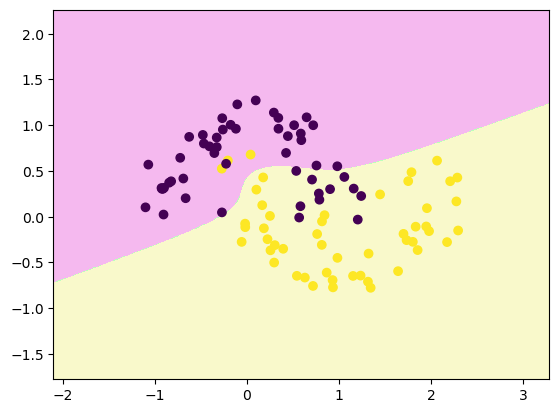

In [46]:
decision_boundary_plot(x,y,poly_svc)

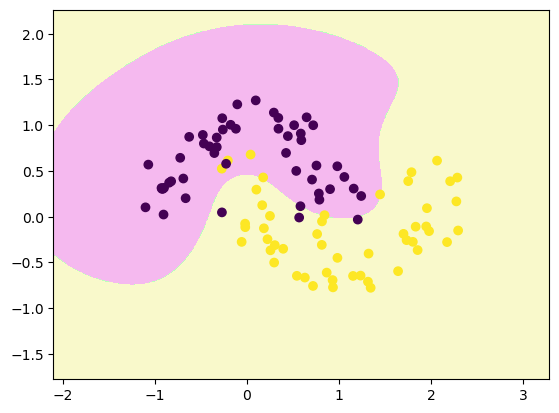

In [60]:
rbf_svc = Pipeline([
    ("std_scaler",StandardScaler()),
    ("rbfSVC",SVC(kernel='rbf',gamma=1))
    # 使用支持向量分类器SVC，设置核函数为径向基函数（高斯核函数rbf）
    # gamma控制单个训练样本的影响范围
    # 值越小影响范围越大，模型更平滑
    # 值越大影响范围越小，模型更复杂
])
rbf_svc.fit(x,y)
decision_boundary_plot(x,y,rbf_svc)

In [62]:
# 当特征多且接近样本数量，可直接选择线性核SVM
# 当特征数少，样本数正常，考虑选用高斯核函数
# 当特征数少，样本数很大，考虑选择多项式核函数